In [1]:
# -*- coding: utf8

from gb import GrangerBusca

import numpy as np

In [2]:
timestamps = []
with open('ticks.dat') as data:
    for l in data:
        timestamps.append([float(x) for x in l.split()[1:]])

granger_model = GrangerBusca(alpha_p=1.0/len(timestamps), num_iter=300,
                             burn_in=200)
granger_model.fit(timestamps)

In [3]:
granger_model.mu_

array([  7.04779096e-04,   6.68390924e-04,   5.30554617e-04,
         5.13411298e-04,   8.74315552e-04,   5.13820141e-04,
         5.09768882e-04,   9.34026992e-04,   4.65625135e-04,
         6.14533379e-04,   0.00000000e+00,   9.42294409e-04,
         3.90386711e-04,   6.87186254e-04,   5.81988592e-04,
         4.37015037e-04,   9.04196213e-04,   6.25243433e-04,
         6.33110752e-04,   4.58232171e-04,   5.66040061e-04,
         9.07024583e-04,   5.86365584e-04,   5.82300068e-04,
         2.36710451e-04,   3.70303003e-04,   0.00000000e+00,
         6.48709386e-04,   4.50089396e-04,   5.91119467e-04,
         5.22920310e-04,   3.46126165e-04,   6.52987179e-04,
         5.73625781e-04,   5.67775804e-04,   5.79090123e-04,
         5.96977695e-04,   5.50160833e-04,   5.51207044e-04,
         3.90190187e-04,   5.57753469e-04,   3.47323521e-04,
         4.41267119e-04,   2.70987604e-04,   2.28230565e-05,
         1.22452863e-04,   6.11144307e-05,   2.38736195e-05,
         0.00000000e+00,

In [4]:
granger_model.Alpha_

<69x69 sparse matrix of type '<class 'numpy.int32'>'
	with 4503 stored elements in Compressed Sparse Row format>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors

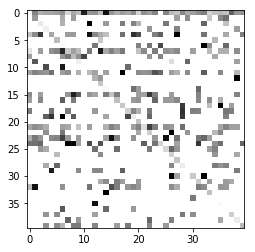

In [14]:
plt.imshow(granger_model.Alpha_.toarray()[:40, :40],
           norm=colors.LogNorm(), cmap=plt.cm.gray)

In [15]:
granger_model.Alpha_.toarray()

array([[37101,   266,  1547, ...,     0,     0,     0],
       [    0,   681,     0, ...,     0,     0,     0],
       [    0,     0, 18733, ...,     0,     0,     0],
       ..., 
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     2,     0],
       [    0,     0,     0, ...,     0,     0,    19]], dtype=int32)

In [18]:
X = granger_model.Alpha_.toarray()
X = (X / X.sum(axis=1)).T

/home/flaviovdf/miniconda3/envs/busca3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [19]:
X

array([[ 0.34793169,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02985745,  0.07643956,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05307397,  0.        ,  0.6426856 , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.06666667,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.18446602]])

In [35]:
from scipy import sparse as sp

def save_sparse_csr(filename, granger_model):
    state = {}
    for key, val in granger_model.curr_state_.items():
        state['id_{}'.format(key)] = np.array(val)
        
    np.savez_compressed(filename,
                        Alpha_data=granger_model.Alpha_.data,
                        Alpha_indices=granger_model.Alpha_.indices,
                        Alpha_indptr=granger_model.Alpha_.indptr,
                        Alpha_shape=granger_model.Alpha_.shape,
                        alpha_p=granger_model.alpha_p,
                        back_=granger_model.back_,
                        beta_=granger_model.beta_,
                        burn_in=granger_model.burn_in,
                        mu_=granger_model.mu_,
                        num_iter=granger_model.num_iter,
                        **state,
                       )

def load_model(filename):
    model = GrangerBusca(0, 0, 0)
    loader = np.load(filename)
    model.Alpha_ = sp.csr_matrix((loader['Alpha_data'],
                                  loader['Alpha_indices'],
                                  loader['Alpha_indptr']),
                                  shape=loader['Alpha_shape'])
    model.alpha_p = loader['alpha_p'][0]
    model.back_ = loader['back_']
    model.beta_ = loader['beta_']
    model.burn_in = loader['burn_in'][0]
    model.mu_ = loader['mu_']
    model.num_iter = loader['num_iter'][0]
    state = {}
    for id_ in range(model.mu_.shape[0]):
        state[id_] = loader['id_{}'.format(id_)]
    model.curr_state_ = state
    return model

In [32]:
save_sparse_csr('first_model-tests.npz', granger_model)

In [36]:
new_model = load_model('first_model-tests.npz')

In [37]:
new_model

In [38]:
granger_model

In [42]:
(new_model.Alpha_ != granger_model.Alpha_).toarray().any()

False

In [43]:
(new_model.back_ != granger_model.back_).any()

False

In [44]:
(new_model.beta_ != granger_model.beta_).any()

False

In [45]:
(new_model.mu_ != granger_model.mu_).any()

False

In [46]:
new_model.burn_in

array(200)

In [47]:
new_model.num_iter

array(300)

In [48]:
new_model.alpha_p

array(0.014492753623188406)

In [49]:
new_model.curr_state_

{0: array([64, 64, -1, ...,  0,  0,  0]),
 1: array([64, -1, -1, ..., 53,  4,  4]),
 2: array([64, 64, -1, ...,  2,  2,  2]),
 3: array([64, 64, 64, ...,  3,  3,  3]),
 4: array([64, -1, -1, ...,  0,  4,  4]),
 5: array([64, 64, 64, ..., 39, 37,  5]),
 6: array([64, 64, 64, ...,  6,  6,  6]),
 7: array([64, -1, -1, ...,  0,  4,  0]),
 8: array([64, 64, 64, ...,  8,  8,  8]),
 9: array([64, 64, 64, ...,  7,  9,  9]),
 10: array([64, 64, 32, 21, 21, 21,  8,  8, 21, 32,  8, 21,  8,  8,  8, 21, 47,
         8, 21,  8, 32,  8, 32,  8, 21,  8, 21, 32,  8, 21,  8, 21, 21,  8,
         8,  8,  8, 32,  8,  8]),
 11: array([64, -1, -1, ..., 11, 21, 11]),
 12: array([64, 64, 64, ...,  0, 12, 12]),
 13: array([64, 64, 64, ..., 13, 13, 13]),
 14: array([64, 64, 64, ..., 14, 14, 14]),
 15: array([64, -1, 15, ..., 21, 32, 15]),
 16: array([64, 64, 64, ..., 16,  0, 16]),
 17: array([64, -1, 31, ...,  7,  4, 17]),
 18: array([64, 64, -1, ..., 18, 18, 18]),
 19: array([64, 64, 64, ..., 32, 19, 19]),
 20

In [50]:
granger_model.curr_state_

{0: [64,
  64,
  -1,
  0,
  -1,
  -1,
  -1,
  64,
  -1,
  7,
  -1,
  7,
  4,
  42,
  42,
  42,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  32,
  0,
  0,
  0,
  42,
  0,
  0,
  42,
  0,
  42,
  7,
  7,
  7,
  0,
  4,
  0,
  7,
  7,
  0,
  7,
  0,
  0,
  0,
  0,
  42,
  0,
  4,
  8,
  7,
  0,
  7,
  7,
  16,
  7,
  7,
  7,
  7,
  7,
  0,
  0,
  0,
  0,
  7,
  7,
  0,
  0,
  8,
  0,
  0,
  0,
  42,
  42,
  23,
  8,
  42,
  0,
  4,
  7,
  42,
  16,
  0,
  7,
  32,
  7,
  0,
  0,
  7,
  8,
  0,
  0,
  7,
  32,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  16,
  32,
  42,
  0,
  0,
  0,
  0,
  0,
  42,
  0,
  0,
  42,
  16,
  42,
  4,
  0,
  32,
  0,
  0,
  0,
  0,
  0,
  42,
  42,
  4,
  7,
  7,
  7,
  7,
  7,
  7,
  4,
  7,
  0,
  0,
  7,
  7,
  7,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  7,
  21,
  0,
  0,
  7,
  0,
  4,
  7,
  7,
  4,
  7,
  7,
  7,
  0,
  7,
  0,
  4,
  7,
  0,
  21,
  7,
  0,
  0,
  0,
  7,
  42,
  0,
  0,
  0,
  42,
  0,
  0,
  0,
  7,
  0,
  7,
  